In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os,sys
import h5py, json
import pickle as pkl
import time

import nept
sys.path.append('../PreProcessing/')
sys.path.append('../TrackingAnalyses/')
sys.path.append('../Lib/')
sys.path.append('../Analyses/')

from importlib import reload  # Python 3.4+ only.
import TrialAnalyses as TA
import zone_analyses_session as ZA
import spike_functions as SF
import TreeMazeFunctions as TMF

In [2]:
oakPaths = {}
oakPaths['Root'] = Path('/mnt/o/giocomo/alexg/')
oakPaths['Clustered'] = Path('/mnt/o/giocomo/alexg/Clustered/')
oakPaths['PreProcessed'] = Path('/mnt/o/giocomo/alexg/PreProcessed/')
oakPaths['Raw'] = Path('/mnt/o/giocomo/alexg/RawData/InVivo/')
oakPaths['Analyses'] = Path('/mnt/o/giocomo/alexg/Analyses')

In [3]:
TA=reload(TA)
animal = 'Li'
task = 'T3g'

CT_Path =  oakPaths['Clustered'] / animal / (animal+'_ClusteringSummary.json')
TrialDat_Fn = oakPaths['Analyses'] / animal / ('{}_{}_TrialAnalysesDat.pkl').format(animal,task)

with CT_Path.open() as f:
    CT = json.load(f)
    
fn = oakPaths['Root'] / (animal+'_SessionPaths.pkl')
with fn.open(mode="rb") as f:
    sePaths = pkl.load(f)
fn = oakPaths['Root'] / (animal+'_AnalysesTable.csv')
aTable = pd.read_csv(fn,index_col=0)

In [5]:
CT['Sessions']

{'Li_OF_052818': 1,
 'Li_OF_052918': 1,
 'Li_OF_053018': 1,
 'Li_OF_053118': 1,
 'Li_OF_060118': 1,
 'Li_OF_060418': 1,
 'Li_OF_060518': 1,
 'Li_OF_060718': 1,
 'Li_OF_060818': 1,
 'Li_OF_061118': 1,
 'Li_OF_061218': 1,
 'Li_OF_061318': 1,
 'Li_OF_061418': 1,
 'Li_OF_061518': 1,
 'Li_OF_061818': 1,
 'Li_OF_062018': 1,
 'Li_OF_062518': 1,
 'Li_OF_062618': 1,
 'Li_OF_062718': 1,
 'Li_OF_062818': 1,
 'Li_OF_062918': 1,
 'Li_OF_070218': 1,
 'Li_OF_070618': 1,
 'Li_OF_071018': 1,
 'Li_OF_080118': 1,
 'Li_OF_080218': 1,
 'Li_T3g_052818': 1,
 'Li_T3g_052918': 1,
 'Li_T3g_053018': 1,
 'Li_T3g_053118': 1,
 'Li_T3g_060118': 1,
 'Li_T3g_060418': 1,
 'Li_T3g_061318': 1,
 'Li_T3g_061518': 1,
 'Li_T3g_061818': 1,
 'Li_T3g_062018': 1,
 'Li_T3g_062518': 1,
 'Li_T3g_062618': 1,
 'Li_T3g_062718': 1,
 'Li_T3g_062818': 1,
 'Li_T3g_070218': 1,
 'Li_T3g_070518': 1,
 'Li_T3g_070618': 1,
 'Li_T3g_070918': 1,
 'Li_T3g_071018': 1,
 'Li_T3g_071118': 1,
 'Li_T3g_072518': 1,
 'Li_T3g_072618': 1,
 'Li_T3g_073018': 

In [161]:
TA = reload(TA)
ZA = reload(ZA)
SF = reload(SF)

se = 'Li_T3g_062718'
sessionPaths = sePaths[se]
PosDat = ZA.TMF.getBehTrackData(sessionPaths,0)

cell_FR,mua_FR = SF.getSessionFR(sessionPaths)
TrInfo,TrCondMat,TrLongMat,TrFRData, TrModFits=TA.main(sessionPaths,overwrite=True,doPlots=False)
# cell_spikes, mua_spikes = SF.getSessionSpikes(sessionPaths,overwrite=1,rej_thr=None)
# cell_bin_spikes, mua_bin_spikes, ids = SF.getSessionBinSpikes(sessionPaths,overwrite=1,cell_spikes=cell_spikes,mua_spikes=mua_spikes)
# cell_FR, mua_FR = SF.getSessionFR(sessionPaths,overwrite=1,cell_bin_spikes=cell_bin_spikes,mua_bin_spikes=mua_bin_spikes)

#TrInfo,TrCondMat,TrLongMat,TrFRData, TrModFits=TA.main(se,overwrite=True,doPlots=False)

Loading Beh Tracking Data
Complete.
Loading FRs ...
FR Loaded.

Analyzing Trials from session Li_T3g_062718
Loading FRs ...
FR Loaded.
Loading Beh Tracking Data
Complete.
Trial Info Dict does not exists. Computing.
Process Completed. Time 1.4485435485839844s
Trial x Condition Matrix Does Not Exist. Computing.
Process Completed. Time 1.0899982452392578s
Trial x Position Long Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.5800740718841553s
Trial x Position Long FiringRate Matrix Does Not Exist. Computing.
Process Completed Time 8.924919128417969s
Trial Model Fits Does Not Exists. Computing

Analyzing cell 0

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Sp+Co

Overall test R2: 0.048
Full Model Test Set Fit completed. Time = 0.8218104839324951

Analyzing cell 1

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Sp+Co

Overall test R2: 0.090
Full Model Test Set Fit completed. Time = 0.9070491790771484

Analyzing cell 2

Computing mixedlm with formula:

In [97]:
TrInfo=TA.getTrInfo(PosDat)

In [162]:
TrInfo['TrSeq']['Sp']

{1: array([ 3.09178938, 52.33263636,  2.90211664, 28.47010633, 40.18608545,
        46.71792724, 34.99065672]),
 2: array([  5.68121171,  69.17708096,   2.71933036,   7.32181279,
        101.35178454,  52.52064761,  44.13730457,  21.3387872 ]),
 3: array([ 5.22871293, 60.53944845,  2.89552815, 38.406146  , 63.76266763,
        52.00854322, 14.43510155, 83.89988717, 83.20576761, 54.72713107,
        18.37290282]),
 4: array([  5.41321926,  67.85817252,   3.83719659,  56.0506269 ,
        195.03046102,  54.83300997,   6.89642884,  21.14666039,
         13.53978877,  14.6088205 ,  16.05226414]),
 5: array([ 3.33609369, 64.40193404,  3.7425033 , 63.01073556, 72.90251032,
        50.51871024, 22.34046441, 48.13899316, 48.81876013, 50.65656829,
        20.79731347]),
 6: array([  3.29888035,  64.72339058,   3.11727134,  55.9728761 ,
        126.2166375 ,  38.43078081,  39.54234956]),
 7: array([ 3.09704949, 68.45542197,  3.69370969, 72.89779832, 75.19183113,
        47.45503062, 57.07226155]

In [157]:
TrLongMat

,trID,Pos,IO,Cue,Desc,Traj,Loc,OTraj,Goal,ioMatch,Co,Valid,Sp,Len,OLen,EvenTrial
0,1,0,Out,R,R,R_S1,Home,R_L1,1,False,Co,True,0.961538,S,L,False
1,2,0,Out,R,L,NaN,NaN,NaN,,False,InCo,False,NaN,,,True
2,3,0,Out,L,R,R_L1,Home,R_S1,1,False,InCo,True,0.192864,L,S,False
3,4,0,Out,L,L,L_L4,Home,L_S4,4,False,Co,True,1.515152,L,S,True
4,5,0,Out,L,R,R_L1,Home,NaN,1,False,InCo,True,1.111111,L,,False
5,6,0,Out,R,R,R_S2,Home,R_S2,2,True,Co,True,1.052632,S,S,True
6,7,0,Out,R,L,L_S3,Home,NaN,3,False,InCo,True,1.379310,S,,False
7,8,0,Out,L,R,R_L1,Home,NaN,1,False,InCo,True,0.749064,L,,True
8,9,0,Out,R,L,L_S3,Home,NaN,3,False,InCo,True,1.418440,S,,False
9,10,0,Out,L,L,L_L4,Home,L_S4,4,False,Co,True,1.104972,L,S,True


In [151]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from joblib import Parallel, delayed
from itertools import combinations

In [158]:
def fitTrModels(TrLongMat,TrFRData):
    all_params = ['Loc:IO','Loc','IO','Cue','Co','Sp']
    param_set = getParamSet()
    nModels = len(param_set)
    R2thr = 0.2

    cellColIDs =  [i for i,item in enumerate(TrFRData.columns.values) if 'cell' in item]
    nCells = len(cellColIDs)
    muaColIDs =  [i for i,item in enumerate(TrFRData.columns.values) if 'mua' in item]
    nMua = len(muaColIDs)
    nTotalUnits = nCells+nMua
    nUnits = {'cell':nCells,'mua':nMua}

    cellCols = TrFRData.columns[cellColIDs]
    muaCols = TrFRData.columns[muaColIDs]
    unitCols = {'cell':cellCols,'mua':muaCols}

    perfCols = ['FullMod_tR2','modelNum','trainR2','AICc','testR2']
    Cols = ['ut']+perfCols+ all_params
    nCols = len(Cols)
    LM_Dat = pd.DataFrame(np.full((nTotalUnits,nCols),np.nan),columns=Cols)
    LM_Dat.loc[:,'ut'] = ['cell']*nCells+['mua']*nMua

    datSubset = ~(TrLongMat['IO']=='O_I') & (TrLongMat['Valid'])
    dat = []
    dat = TrLongMat[datSubset].copy()
    dat['trID'] = dat['trID'].astype('category')
    dat = dat.reset_index()
    dat['zFR'] = np.zeros(dat.shape[0])

    try:
        with Parallel(n_jobs=16) as parallel:
            cnt=0
            for ut in ['cell','mua']:
                for cell in np.arange(nUnits[ut]):
                    print('\nAnalyzing {} {}'.format(ut,cell))

                    dat.loc[:,'zFR'] = TrFRData.loc[datSubset,unitCols[ut][cell]].values

                    t1 = time.time()
                    tR2 = getModel_testR2(dat,params=all_params)
                    t2 = time.time()
                    LM_Dat.loc[cnt,'FullMod_tR2'] = tR2

                    print('Full Model Test Set Fit completed. Time = {}'.format(t2-t1))
                    if tR2>=R2thr:
                        print('Full Model passed the threshold, looking for optimal submodel.')
                        r = parallel(delayed(getModelPerf)(dat,params=params) for params in param_set.values())
                        trainR2,trainAICc,_ = zip(*r)

                        t3 = time.time()
                        print('\n\nFitting Completed for {0} {1}, total time = {2:0.3f}s'.format(ut,cell,t3-t1))
                        selMod = np.argmin(trainAICc)

                        selMod_tR2 = getModel_testR2(dat,params=param_set[selMod])
                        print('Selected Model = {}, AICc = {}, testR2 = {} '.format(selMod,trainAICc[selMod],selMod_tR2))

                        LM_Dat.loc[cnt,'modelNum']=selMod
                        LM_Dat.loc[cnt,'trainR2']=trainR2[selMod]
                        LM_Dat.loc[cnt,'AICc'] = trainAICc[selMod]
                        LM_Dat.loc[cnt,'testR2'] = selMod_tR2

                        temp = r[selMod][2].wald_test_terms()
                        LM_Dat.loc[cnt,param_set[selMod]] = np.sqrt(temp.summary_frame()['chi2'][param_set[selMod]])
                    cnt+=1
    except:
        pass
def getParamSet():
    '''
    Returns a dictionary of parameter sets for modeling.
    '''
    params = ['Loc','IO','Cue','Co','Sp']
    combs = []

    for i in np.arange(1, len(params)+1):
        combs+= [list(x) for x in combinations(params, i)]
    param_set = {}
    cnt=0
    for c in combs:
        param_set[cnt] = c
        cnt+=1

    for c in combs:
        if ('IO' in c) and ('Loc' in c):
            param_set[cnt] = ['Loc:IO']+c
            cnt+=1
    return param_set


In [159]:
getParamSet()



{0: ['Loc'],
 1: ['IO'],
 2: ['Cue'],
 3: ['Co'],
 4: ['Sp'],
 5: ['Loc', 'IO'],
 6: ['Loc', 'Cue'],
 7: ['Loc', 'Co'],
 8: ['Loc', 'Sp'],
 9: ['IO', 'Cue'],
 10: ['IO', 'Co'],
 11: ['IO', 'Sp'],
 12: ['Cue', 'Co'],
 13: ['Cue', 'Sp'],
 14: ['Co', 'Sp'],
 15: ['Loc', 'IO', 'Cue'],
 16: ['Loc', 'IO', 'Co'],
 17: ['Loc', 'IO', 'Sp'],
 18: ['Loc', 'Cue', 'Co'],
 19: ['Loc', 'Cue', 'Sp'],
 20: ['Loc', 'Co', 'Sp'],
 21: ['IO', 'Cue', 'Co'],
 22: ['IO', 'Cue', 'Sp'],
 23: ['IO', 'Co', 'Sp'],
 24: ['Cue', 'Co', 'Sp'],
 25: ['Loc', 'IO', 'Cue', 'Co'],
 26: ['Loc', 'IO', 'Cue', 'Sp'],
 27: ['Loc', 'IO', 'Co', 'Sp'],
 28: ['Loc', 'Cue', 'Co', 'Sp'],
 29: ['IO', 'Cue', 'Co', 'Sp'],
 30: ['Loc', 'IO', 'Cue', 'Co', 'Sp'],
 31: ['Loc:IO', 'Loc', 'IO'],
 32: ['Loc:IO', 'Loc', 'IO', 'Cue'],
 33: ['Loc:IO', 'Loc', 'IO', 'Co'],
 34: ['Loc:IO', 'Loc', 'IO', 'Sp'],
 35: ['Loc:IO', 'Loc', 'IO', 'Cue', 'Co'],
 36: ['Loc:IO', 'Loc', 'IO', 'Cue', 'Sp'],
 37: ['Loc:IO', 'Loc', 'IO', 'Co', 'Sp'],
 38: ['Loc:IO'

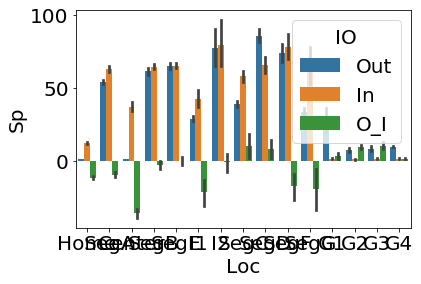

In [149]:
sns.barplot(x='Loc',y='Sp',hue='IO',data=TrLongMat)

In [148]:
tr=12
subset = TrLongMat['trID']==12
TrLongMat.loc[subset]


,trID,Pos,IO,Cue,Desc,Traj,Loc,OTraj,Goal,ioMatch,Co,Valid,Sp,Len,OLen,EvenTrial
11,12,0,Out,L,R,R_S2,Home,R_S2,2,True,InCo,True,1.470588,S,S,True
222,12,1,Out,L,R,R_S2,SegA,R_S2,2,True,InCo,True,65.625000,S,S,True
433,12,2,Out,L,R,R_S2,Center,R_S2,2,True,InCo,True,1.250000,S,S,True
644,12,3,Out,L,R,R_S2,SegB,R_S2,2,True,InCo,True,77.777778,S,S,True
855,12,4,Out,L,R,R_S2,I1,R_S2,2,True,InCo,True,21.428571,S,S,True
1066,12,5,Out,L,R,R_S2,SegD,R_S2,2,True,InCo,True,105.000000,S,S,True
1277,12,6,Out,L,R,R_S2,G2,R_S2,2,True,InCo,True,9.523810,S,S,True
1488,12,7,Out,L,R,R_S2,NaN,R_S2,2,True,InCo,False,NaN,S,S,True
1699,12,8,Out,L,R,R_S2,NaN,R_S2,2,True,InCo,False,NaN,S,S,True
1910,12,9,Out,L,R,R_S2,NaN,R_S2,2,True,InCo,False,NaN,S,S,True


In [111]:
sp,osp,sp-osp[::-1]

(array([  1.47058824,  65.625     ,   1.25      ,  77.77777778,
         21.42857143, 105.        ,   9.52380952]),
 array([  4.25531915, 131.25      ,  15.        ,  84.        ,
         25.        ,  58.33333333,   0.52910053]),
 array([  0.94148771,   7.29166667, -23.75      ,  -6.22222222,
          6.42857143, -26.25      ,   5.26849037]))

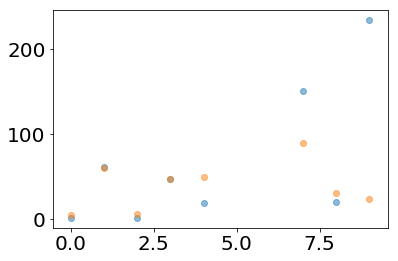

In [93]:
plt.scatter(p,sp,alpha=0.5)
plt.scatter(p,sp2,alpha=0.5)

In [34]:
TA = reload(TA)
TrInfo,TrCondMat,TrLongMat,TrFRData, TrModFits=TA.main(sessionPaths,overwrite=True,doPlots=False,PosDat=PosDat,cell_FR=cell_FR,mua_FR=mua_FR)


Analyzing Trials from session Li_T3g_062718
Trial Info Dict does not exists. Computing.
Process Completed. Time 1.295654535293579s
Trial x Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.5224888324737549s
Trial x Position Long Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.5990633964538574s
Trial x Position Long FiringRate Matrix Does Not Exist. Computing.
Process Completed Time 8.97640872001648s
Trial Model Fits Does Not Exists. Computing

Analyzing cell 0

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Desc+Co

Overall test R2: 0.046
Full Model Test Set Fit completed. Time = 23.01800012588501

Analyzing cell 1

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Desc+Co

Overall test R2: 0.083
Full Model Test Set Fit completed. Time = 0.7829983234405518

Analyzing cell 2

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Desc+Co

Overall test R2: 0.213
Full Model Test Set Fit completed. Time = 0.592991828918457
Full Mod

In [40]:
cell_spikes, mua_spikes = SF.getSessionSpikes(sessionPaths,overwrite=1,rej_thr=1)
cell_bin_spikes, mua_bin_spikes, ids = SF.getSessionBinSpikes(sessionPaths,overwrite=1,cell_spikes=cell_spikes,mua_spikes=mua_spikes)
cell_FR, mua_FR = SF.getSessionFR(sessionPaths,overwrite=1,cell_bin_spikes=cell_bin_spikes,mua_bin_spikes=mua_bin_spikes)
TA = reload(TA)
TrInfo,TrCondMat,TrLongMat,TrFRData, TrModFits=TA.main(sessionPaths,overwrite=True,doPlots=False,PosDat=PosDat,cell_FR=cell_FR,mua_FR=mua_FR)

Spikes Files not Found or overwrite=1, creating them.
Binned Spikes Files not Found or overwrite=1, creating them.
Missing resampled time input (resamp_t).
Loading Beh Tracking Data
Complete.
Bin Spike File Creation and Saving Completed.
Firing Rate Files Not Found or overwrite=1, creating them.
Spike File Creation and Saving Completed.

Analyzing Trials from session Li_T3g_062718
Trial Info Dict does not exists. Computing.
Process Completed. Time 1.388181447982788s
Trial x Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.49335813522338867s
Trial x Position Long Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.9902338981628418s
Trial x Position Long FiringRate Matrix Does Not Exist. Computing.
Process Completed Time 8.999404191970825s
Trial Model Fits Does Not Exists. Computing

Analyzing cell 0

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Desc+Co

Overall test R2: 0.028
Full Model Test Set Fit completed. Time = 1.2426071166992188



In [41]:
cell_spikes, mua_spikes = SF.getSessionSpikes(sessionPaths,overwrite=1,rej_thr=1.2)
cell_bin_spikes, mua_bin_spikes, ids = SF.getSessionBinSpikes(sessionPaths,overwrite=1,cell_spikes=cell_spikes,mua_spikes=mua_spikes)
cell_FR, mua_FR = SF.getSessionFR(sessionPaths,overwrite=1,cell_bin_spikes=cell_bin_spikes,mua_bin_spikes=mua_bin_spikes)
TA = reload(TA)
TrInfo,TrCondMat,TrLongMat,TrFRData, TrModFits=TA.main(sessionPaths,overwrite=True,doPlots=False,PosDat=PosDat,cell_FR=cell_FR,mua_FR=mua_FR)

Spikes Files not Found or overwrite=1, creating them.
Binned Spikes Files not Found or overwrite=1, creating them.
Missing resampled time input (resamp_t).
Loading Beh Tracking Data
Complete.
Bin Spike File Creation and Saving Completed.
Firing Rate Files Not Found or overwrite=1, creating them.
Spike File Creation and Saving Completed.

Analyzing Trials from session Li_T3g_062718
Trial Info Dict does not exists. Computing.
Process Completed. Time 1.5422978401184082s
Trial x Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.6182668209075928s
Trial x Position Long Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.6128547191619873s
Trial x Position Long FiringRate Matrix Does Not Exist. Computing.
Process Completed Time 9.019323587417603s
Trial Model Fits Does Not Exists. Computing

Analyzing cell 0

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Desc+Co

Overall test R2: 0.033
Full Model Test Set Fit completed. Time = 0.7144753932952881



In [37]:
cell_spikes, mua_spikes = SF.getSessionSpikes(sessionPaths,overwrite=1,rej_thr=3)
cell_bin_spikes, mua_bin_spikes, ids = SF.getSessionBinSpikes(sessionPaths,overwrite=1,cell_spikes=cell_spikes,mua_spikes=mua_spikes)
cell_FR, mua_FR = SF.getSessionFR(sessionPaths,overwrite=1,cell_bin_spikes=cell_bin_spikes,mua_bin_spikes=mua_bin_spikes)
TA = reload(TA)
TrInfo,TrCondMat,TrLongMat,TrFRData, TrModFits=TA.main(sessionPaths,overwrite=True,doPlots=False,PosDat=PosDat,cell_FR=cell_FR,mua_FR=mua_FR)

Spikes Files not Found or overwrite=1, creating them.
Binned Spikes Files not Found or overwrite=1, creating them.
Missing resampled time input (resamp_t).
Loading Beh Tracking Data
Complete.
Bin Spike File Creation and Saving Completed.
Firing Rate Files Not Found or overwrite=1, creating them.
Spike File Creation and Saving Completed.

Analyzing Trials from session Li_T3g_062718
Trial Info Dict does not exists. Computing.
Process Completed. Time 1.3326590061187744s
Trial x Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.5603129863739014s
Trial x Position Long Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.5620954036712646s
Trial x Position Long FiringRate Matrix Does Not Exist. Computing.
Process Completed Time 9.100197076797485s
Trial Model Fits Does Not Exists. Computing

Analyzing cell 0

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Desc+Co

Overall test R2: 0.042
Full Model Test Set Fit completed. Time = 12.87859582901001

A

In [ ]:
np.mean(cell_bin_spikes,axis=1)*50

In [54]:
TrFRData[TrLongMat['Valid']]

,Unnamed: 0,index,cell_0,cell_1,cell_2,cell_3,cell_4,cell_5,mua_0,trID,Pos,IO
0,0,0,NaN,0.342320,0.571519,NaN,-0.339319,-0.316221,-0.822955,1,0,Out
1,1,1,NaN,0.283877,0.640508,NaN,0.401388,-0.104554,-0.137904,2,0,Out
4,4,4,NaN,0.182754,0.444696,NaN,-0.904395,-0.631460,0.030436,5,0,Out
5,5,5,NaN,0.160245,0.589037,NaN,-0.562311,-0.687009,-0.578264,6,0,Out
7,7,7,NaN,-0.138452,0.354027,NaN,-0.443610,-0.496004,-0.485975,8,0,Out
8,8,8,NaN,0.425869,0.569594,NaN,-0.306536,-0.400725,-0.941341,9,0,Out
9,9,9,NaN,0.106462,0.146738,NaN,-0.797416,0.396421,-1.012494,10,0,Out
10,10,10,NaN,0.109468,0.345245,NaN,-0.714859,-0.471977,-1.812075,11,0,Out
11,11,11,NaN,0.496884,0.385276,NaN,-0.107190,-0.027813,0.058328,12,0,Out
12,12,12,NaN,-0.023355,0.002791,NaN,-0.438863,-0.981639,0.115155,13,0,Out
